# Part 1: Data Analysis

## 1.1 Data Exploring

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Let's read the data from the file and check the first few rows of the data.
df = pd.read_csv("sunspot_data.csv")
df.head()

,Unnamed: 0,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
0,0,1818,1,1,1818.001,-1,-1.0,0,1
1,1,1818,1,2,1818.004,-1,-1.0,0,1
2,2,1818,1,3,1818.007,-1,-1.0,0,1
3,3,1818,1,4,1818.010,-1,-1.0,0,1
4,4,1818,1,5,1818.012,-1,-1.0,0,1


In [3]:
#Let's remove the repeated index column from the data.
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.head()

,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
0,1818,1,1,1818.001,-1,-1.0,0,1
1,1818,1,2,1818.004,-1,-1.0,0,1
2,1818,1,3,1818.007,-1,-1.0,0,1
3,1818,1,4,1818.010,-1,-1.0,0,1
4,1818,1,5,1818.012,-1,-1.0,0,1


In [5]:
df.shape

(73718, 8)

In [6]:
# Let's check if there's any missing values in the data
df.isna().sum()

Year                        0
Month                       0
Day                         0
Date In Fraction Of Year    0
Number of Sunspots          0
Standard Deviation          0
Observations                0
Indicator                   0
dtype: int64

In [7]:
# The missing values of number of sunspots is denoted by -1, so df.isna().sum() didn't find any missing values.
sum(df['Number of Sunspots'] == -1)

3247

In [8]:
# Thus, we have 3247 missing number of sunspots

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73718 entries, 0 to 73717
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      73718 non-null  int64  
 1   Month                     73718 non-null  int64  
 2   Day                       73718 non-null  int64  
 3   Date In Fraction Of Year  73718 non-null  float64
 4   Number of Sunspots        73718 non-null  int64  
 5   Standard Deviation        73718 non-null  float64
 6   Observations              73718 non-null  int64  
 7   Indicator                 73718 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 4.5 MB


In [10]:
df.describe()

,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
count,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000
mean,1918.416750,6.518896,15.729347,1918.916406,79.248732,6.924587,4.429678,0.998331
std,58.264401,3.447114,8.800032,58.264520,77.470942,4.778793,7.884112,0.040814
min,1818.000000,1.000000,1.000000,1818.001000,-1.000000,-1.000000,0.000000,0.000000
25%,1868.000000,4.000000,8.000000,1868.458500,15.000000,3.000000,1.000000,1.000000
50%,1918.000000,7.000000,16.000000,1918.917500,58.000000,6.600000,1.000000,1.000000
75%,1969.000000,10.000000,23.000000,1969.373250,125.000000,10.000000,1.000000,1.000000
max,2019.000000,12.000000,31.000000,2019.832000,528.000000,77.700000,60.000000,1.000000


## 1.2 Exploratory Data Analysis

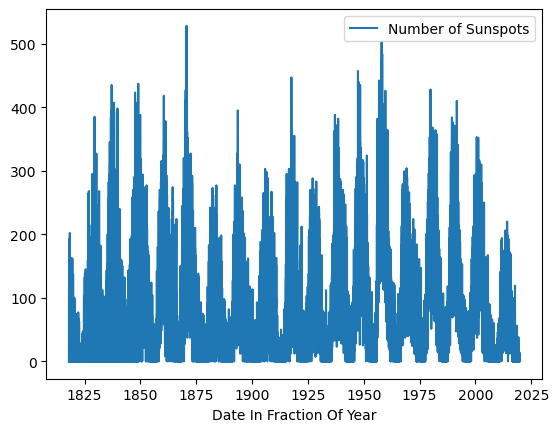

In [11]:
# (1) Sunspots distribution 
df.plot('Date In Fraction Of Year', 'Number of Sunspots');

From abover plot we can see that there is periodic increase in number of sunspots.

In [12]:
# Let's see the correlations
y1 = df['Number of Sunspots']
X1 = df.drop(columns = ["Number of Sunspots"] ) 
# corelation y ~ X 
corr_X1 = X1.corrwith(y1)
corr_X1.sort_values(ascending=False)

Standard Deviation          0.837165
Date In Fraction Of Year    0.128850
Year                        0.128837
Indicator                   0.041408
Month                       0.002993
Day                        -0.002208
Observations               -0.028468
dtype: float64

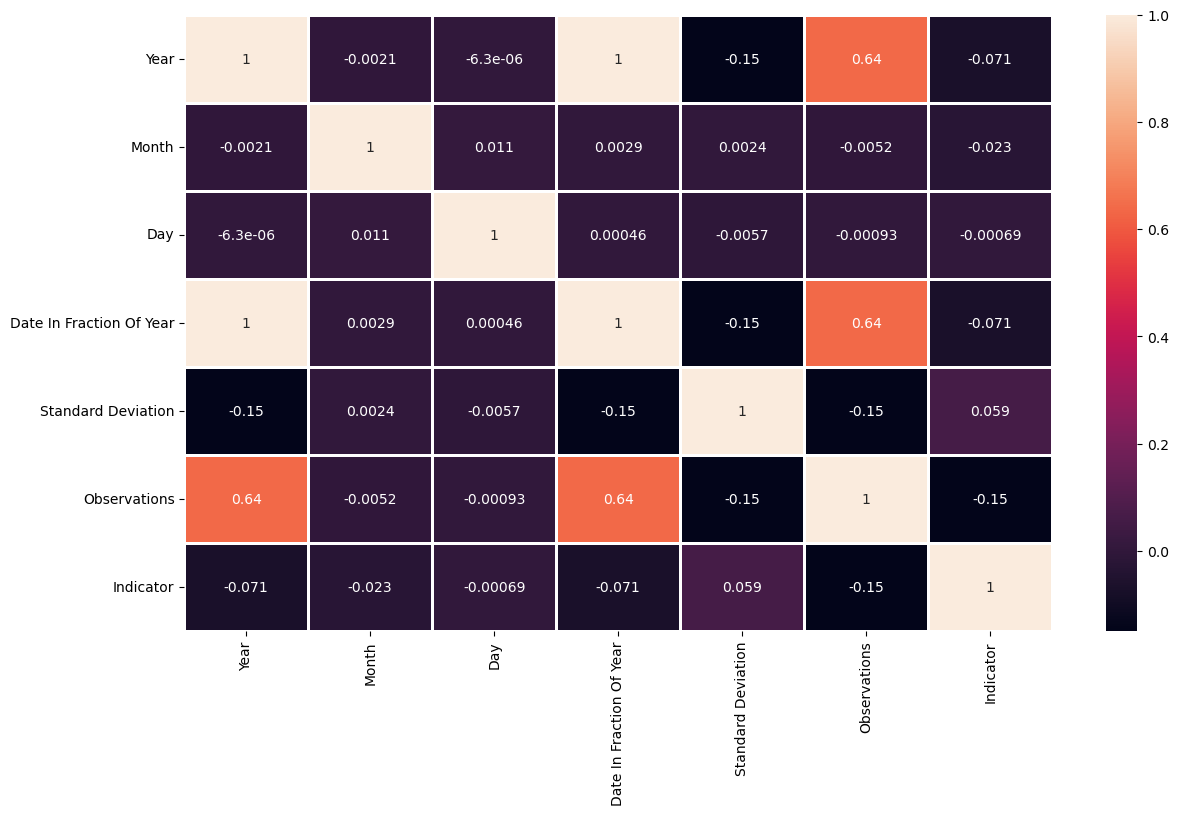

In [13]:
# (2) correlation matrix X ~ X

# use a bigger size
plt.figure(figsize=(14, 8))

# correlation heatmap
sns.heatmap(X1.corr(), annot=True, linewidth =1)

plt.show() 

In [14]:
corr_df = df.corr()
corr_df

,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
Year,1.000000,-0.002064,-0.000006,0.999988,0.128837,-0.149085,0.638723,-0.070575
Month,-0.002064,1.000000,0.010570,0.002871,0.002993,0.002403,-0.005204,-0.023447
Day,-0.000006,0.010570,1.000000,0.000459,-0.002208,-0.005698,-0.000928,-0.000691
Date In Fraction Of Year,0.999988,0.002871,0.000459,1.000000,0.128850,-0.149076,0.638695,-0.070691
Number of Sunspots,0.128837,0.002993,-0.002208,0.128850,1.000000,0.837165,-0.028468,0.041408
Standard Deviation,-0.149085,0.002403,-0.005698,-0.149076,0.837165,1.000000,-0.147914,0.058801
Observations,0.638723,-0.005204,-0.000928,0.638695,-0.028468,-0.147914,1.000000,-0.148822
Indicator,-0.070575,-0.023447,-0.000691,-0.070691,0.041408,0.058801,-0.148822,1.000000


# Part 2: Machine Learning

## 2.1 Feature Engineering and Selection

In [15]:
# Let's drop the rows with missing number of sunspots values(i.e. -1).
df = df.drop(df[df['Number of Sunspots'] == -1].index)
df.head()

,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
7,1818,1,8,1818.021,65,10.2,1,1
12,1818,1,13,1818.034,37,7.7,1,1
16,1818,1,17,1818.045,77,11.1,1,1
17,1818,1,18,1818.048,98,12.6,1,1
18,1818,1,19,1818.051,105,13.0,1,1


In [16]:
# Let's see the correlations again
y1 = df['Number of Sunspots']
X1 = df.drop(columns = ["Number of Sunspots"] ) 
# corelation y ~ X 
corr_X1 = X1.corrwith(y1)
corr_X1.sort_values(ascending=False)

Standard Deviation          0.831973
Date In Fraction Of Year    0.064322
Year                        0.064302
Indicator                   0.044474
Month                       0.003905
Day                        -0.000028
Observations               -0.057121
dtype: float64

In [17]:
# Let's drop the less important features, i.e. features with low correlation.
df.drop(['Month','Day','Observations', 'Indicator'], axis=1, inplace=True)

In [18]:
df.describe()

,Year,Date In Fraction Of Year,Number of Sunspots,Standard Deviation
count,70471.000000,70471.000000,70471.000000,70471.000000
mean,1922.314683,1922.814074,82.946247,7.289718
std,56.591214,56.591651,77.252109,4.567518
min,1818.000000,1818.021000,0.000000,0.000000
25%,1875.000000,1875.126000,21.000000,3.500000
50%,1923.000000,1923.363000,63.000000,6.800000
75%,1971.000000,1971.597500,127.000000,10.200000
max,2019.000000,2019.832000,528.000000,77.700000


## 2.2 Machine Learning Models

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [20]:
y = df['Number of Sunspots']
X = df.drop(columns = ["Number of Sunspots"] ) 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_scaled_trained=scale.fit_transform(X_train)
X_scaled_test = scale.transform(X_test)

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), X.columns)
    ])

### Model 1: Random Forest Regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# Create the regressor
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', RandomForestRegressor(random_state=42))])

# Train the regressor on the training data
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['Year', 'Date In Fraction Of Year', 'Standard Deviation'], dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [25]:
# Make predictions on the test set
rf_preds = rf_pipeline.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error
rf_mae = mean_absolute_error(y_test, rf_preds)
print("Mean absolute error: %.2f" % rf_mae)


from sklearn.metrics import mean_squared_error
rf_mse = mean_squared_error(y_test, rf_preds)
print("Random Forest Mean squared error: %.2f" % rf_mse)




Mean absolute error: 3.54
Random Forest Mean squared error: 126.89


### Model 2: Linear Regression with Polynomial Features

In [26]:
from sklearn.linear_model import LinearRegression
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', LinearRegression())])
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['Year', 'Date In Fraction Of Year', 'Standard Deviation'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [27]:
lr_preds = lr_pipeline.predict(X_test)

lr_mse = mean_squared_error(y_test, lr_preds)
print("Linear Regression Mean squared error: %.2f" % lr_mse)

lr_mae = mean_absolute_error(y_test, lr_preds)
print("Mean absolute error: %.2f" % lr_mae)

Linear Regression Mean squared error: 1209.35
Mean absolute error: 23.97


### Model 3: Artificial Neural Network

In [28]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(
 hidden_layer_sizes=(900,), activation='tanh',
 solver='adam',
 alpha=0.0001,
 batch_size='auto',
 learning_rate='constant',
 learning_rate_init=0.1,
 power_t=0.5,
 max_iter=9) 

mlp.fit(X_scaled_trained, y_train)
# mlp.fit(X_scaled, y_train)

C:\Users\Chukky\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='tanh', hidden_layer_sizes=(900,),
             learning_rate_init=0.1, max_iter=9)

In [29]:
# y_pred3 = mlp.predict(X_test)
ann_preds = mlp.predict(X_scaled_test)

ann_mse = mean_squared_error(y_test, ann_preds)
print("Mean squared error: %.2f" % ann_mse)
ann_mae = mean_absolute_error(y_test, ann_preds)
print("Mean absolute error: %.2f" % ann_mae)

Mean squared error: 358.89
Mean absolute error: 9.35


## Model Comparision

,Random_Forest,Linear_Regression,ANN
Mean_absolute_error,3.539856,23.974173,9.351783


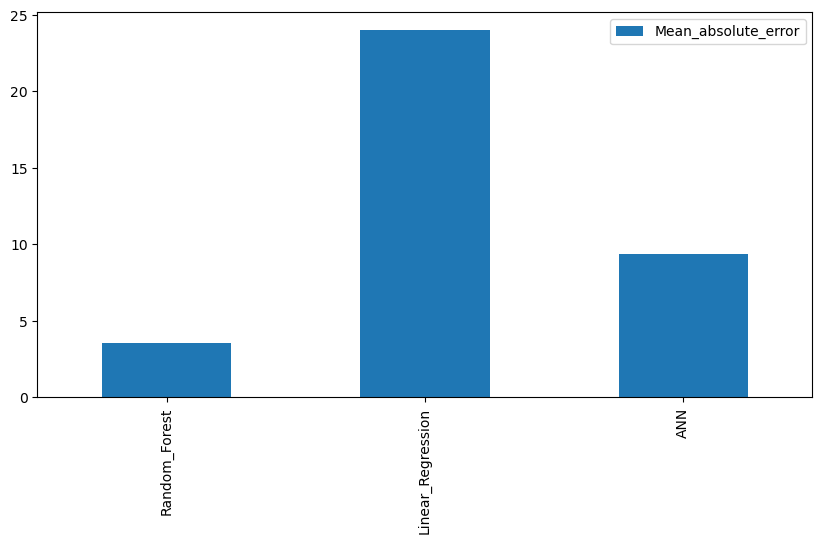

In [30]:
model_compare = pd.DataFrame({"Random_Forest":rf_mae, "Linear_Regression":lr_mae, "ANN":ann_mae}, index=["Mean_absolute_error"])
model_compare.T.plot.bar(figsize=[10, 5]) 

display(model_compare)

plt.show( )

,Random_Forest,Linear_Regression,ANN
Mean_squared_error,126.887939,1209.354549,358.894976


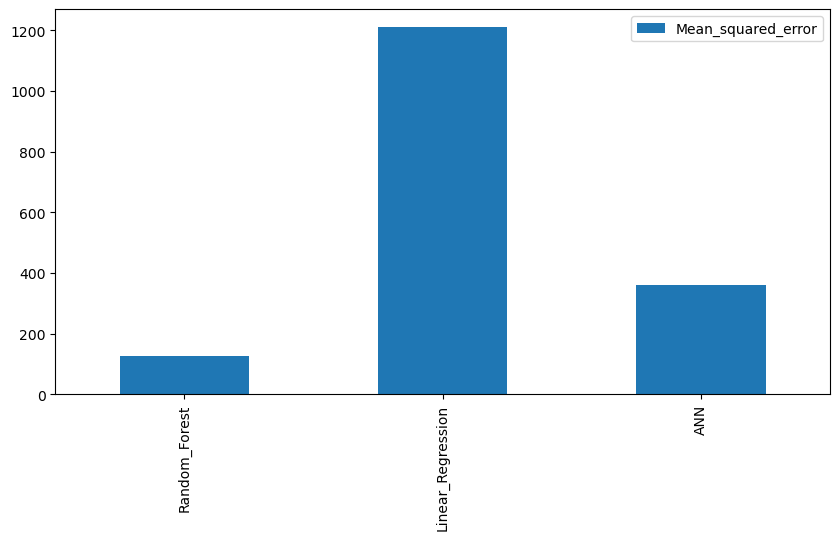

In [31]:
model_compare = pd.DataFrame({"Random_Forest":rf_mse, "Linear_Regression":lr_mse, "ANN":ann_mse}, index=["Mean_squared_error"])
model_compare.T.plot.bar(figsize=[10, 5]) 

display(model_compare)

plt.show( )

Random Forest Regressor not only provided predictions closest to the actual numbers of sunspots, but it also had fewer large errors, making it the most suitable model for this project according to the analysis.i
/